# WeatherPy my

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


In [29]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key + "&q=" + city + "&units=metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_api_key = "appid=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}
    
    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    time.sleep(1)    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | saint-georges
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | albertina
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | marsa alam
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | hanting
Processing Record 13 of Set 1 | enoch
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | qoryooley
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | masina
Processing Record 18 of Set 1 | sandnessjoen
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | tukrah
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | 

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [31]:
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,20.86,99,19,2.47,EC,1719996291
1,uturoa,-16.7333,-151.4333,25.84,75,38,10.64,PF,1719996293
2,adamstown,-25.0660,-130.1015,20.60,62,100,6.11,PN,1719996294
3,ushuaia,-54.8000,-68.3000,1.81,80,75,6.69,AR,1719996296
4,ilulissat,69.2167,-51.1000,3.01,100,100,0.51,GL,1719996297


In [33]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,20.86,99,19,2.47,EC,2024-07-03
1,uturoa,-16.7333,-151.4333,25.84,75,38,10.64,PF,2024-07-03
2,adamstown,-25.0660,-130.1015,20.60,62,100,6.11,PN,2024-07-03
3,ushuaia,-54.8000,-68.3000,1.81,80,75,6.69,AR,2024-07-03
4,ilulissat,69.2167,-51.1000,3.01,100,100,0.51,GL,2024-07-03


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,20.86,99,19,2.47,EC,2024-07-03
1,uturoa,-16.7333,-151.4333,25.84,75,38,10.64,PF,2024-07-03
2,adamstown,-25.0660,-130.1015,20.60,62,100,6.11,PN,2024-07-03
3,ushuaia,-54.8000,-68.3000,1.81,80,75,6.69,AR,2024-07-03
4,ilulissat,69.2167,-51.1000,3.01,100,100,0.51,GL,2024-07-03


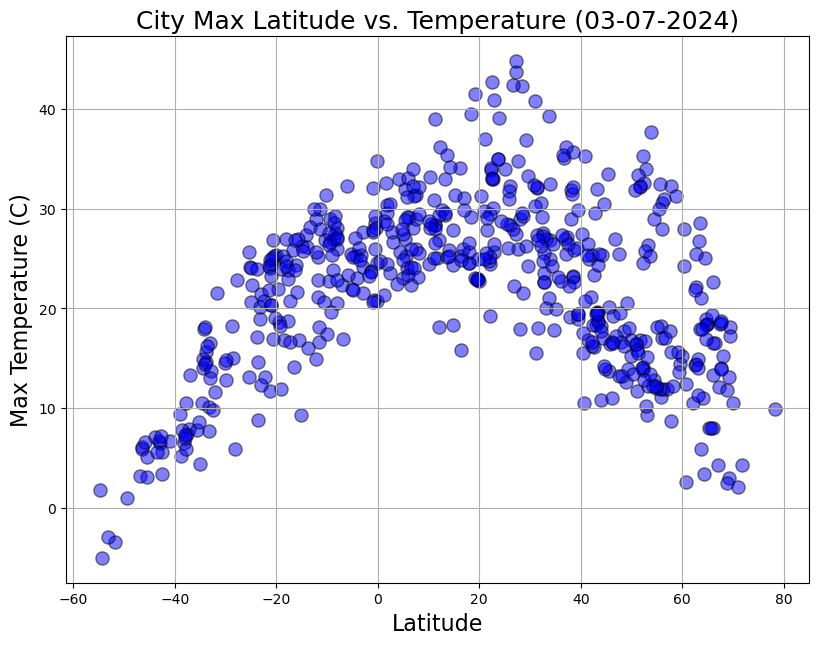

In [37]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="b", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (03-07-2024)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

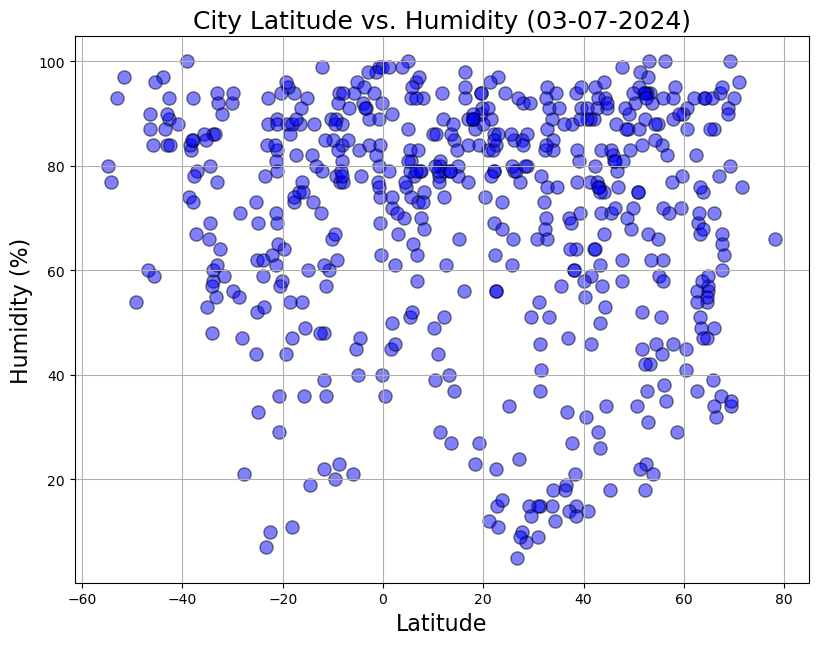

In [41]:
# Latitude Vs. Humidity
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (03-07-2024)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

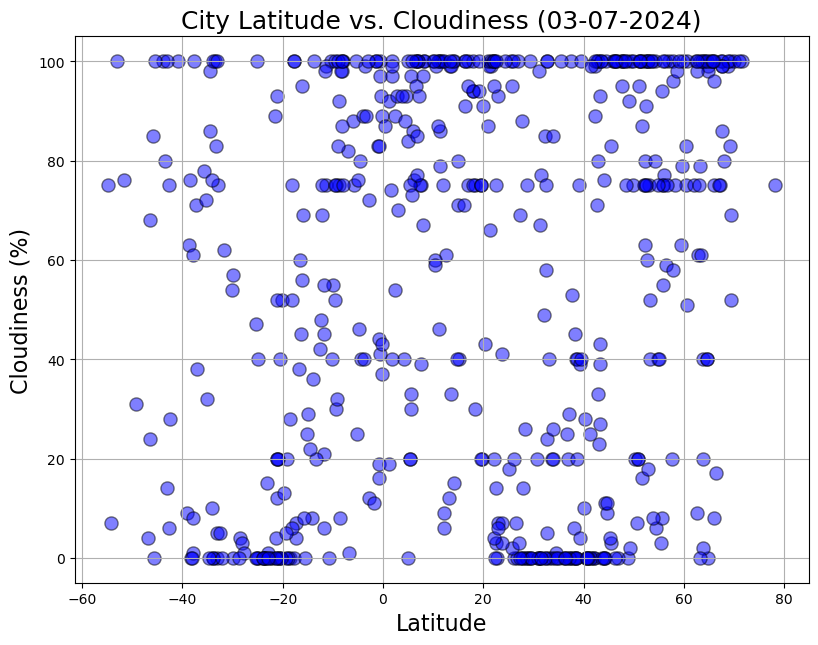

In [39]:
# Latitude Vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (03-07-2024)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

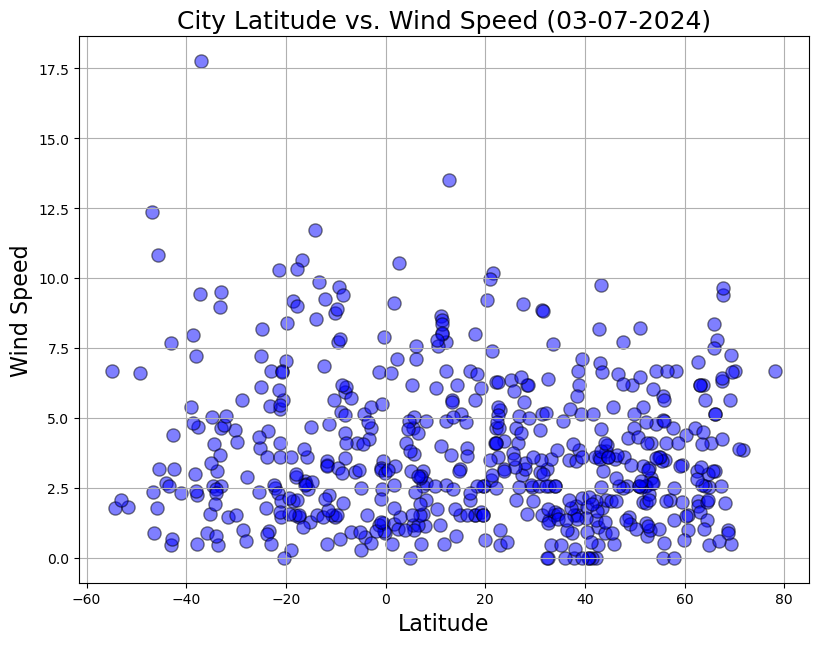

In [40]:
# Latitude vs. Wind Speed Plot
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("City Latitude vs. Wind Speed (03-07-2024)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

In [42]:
# Compute Linear Regression for Each Relationship
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r^value is: {round(rvalue**2, 8)}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]
northern_hemi_cities = len(northern_hemi_df)

# Display sample data
print(f'In this dataframe there are {northern_hemi_cities} cities in the Northern Hemisphere.')
northern_hemi_df.head()

In this dataframe there are 370 cities in the Northern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ilulissat,69.2167,-51.1000,3.01,100,100,0.51,GL,2024-07-03
5,saint-georges,12.0564,-61.7485,26.82,89,75,7.72,GD,2024-07-03
6,tiksi,71.6872,128.8694,4.30,76,100,3.85,RU,2024-07-03
8,aasiaat,68.7098,-52.8699,2.51,91,99,0.99,GL,2024-07-03
9,marsa alam,25.0757,34.8918,33.97,34,18,6.37,EG,2024-07-03


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]
southern_hemi_cities = len(southern_hemi_df)

# Display sample data
print(f'In this dataframe there are {southern_hemi_cities} cities in the Northern Hemisphere.')
southern_hemi_df.head()

In this dataframe there are 183 cities in the Northern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,20.86,99,19,2.47,EC,2024-07-03
1,uturoa,-16.7333,-151.4333,25.84,75,38,10.64,PF,2024-07-03
2,adamstown,-25.0660,-130.1015,20.60,62,100,6.11,PN,2024-07-03
3,ushuaia,-54.8000,-68.3000,1.81,80,75,6.69,AR,2024-07-03
7,albertina,-22.2008,-46.6158,13.05,63,0,2.51,BR,2024-07-03


# Temperature vs. Latitude Linear Regression Plot

The r^value is: 0.34540359


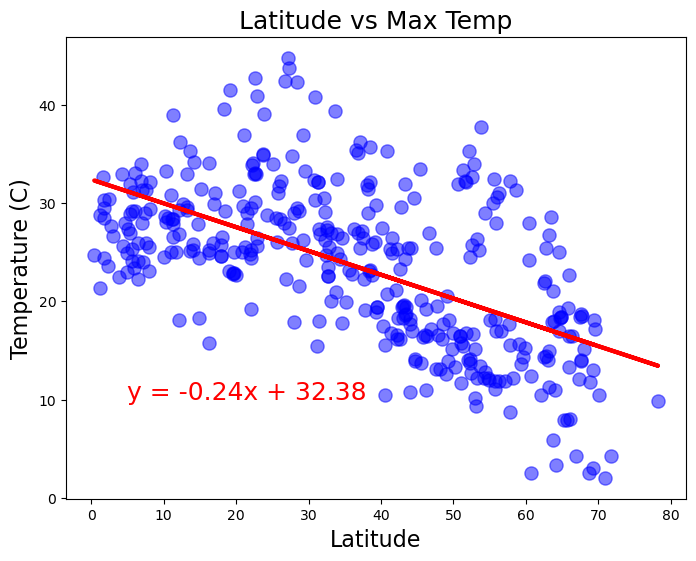

In [45]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, 10, "Temperature (C)")
plt.title("Latitude vs Max Temp", fontsize=18)
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

The r^value is: 0.71622862


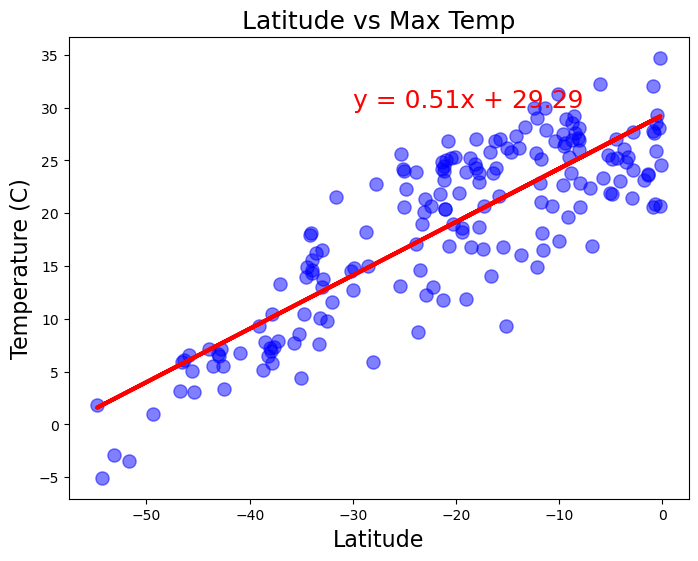

In [46]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -30, 30, "Temperature (C)")
plt.title("Latitude vs Max Temp", fontsize=18)
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship:
There is a strong negative correlation between latitude and max temperature for northern hemisphere (R^2 value 0.34).
There is a positive correlation between latitude and max temperature for southern hemisphere (R^2 value 0.71).

# Humidity vs. Latitude Linear Regression Plot

The r^value is: 0.00303588


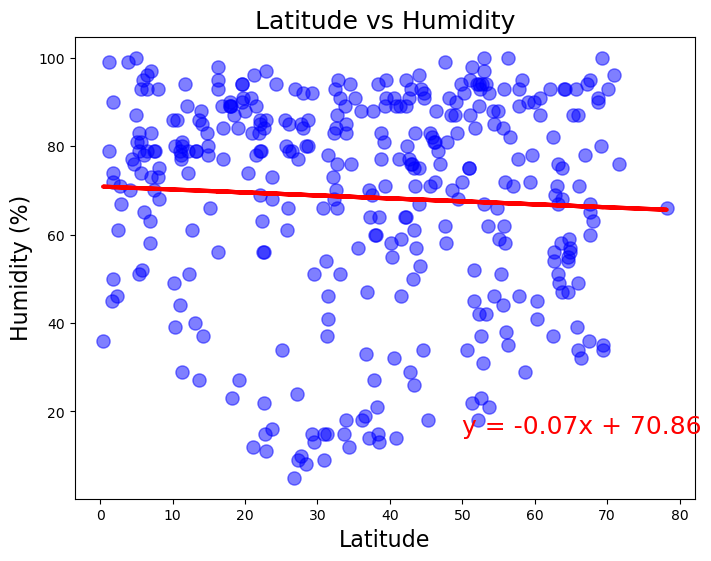

In [47]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 15, "Humidity (%)")
plt.title("Latitude vs Humidity", fontsize=18)
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r^value is: 0.00198641


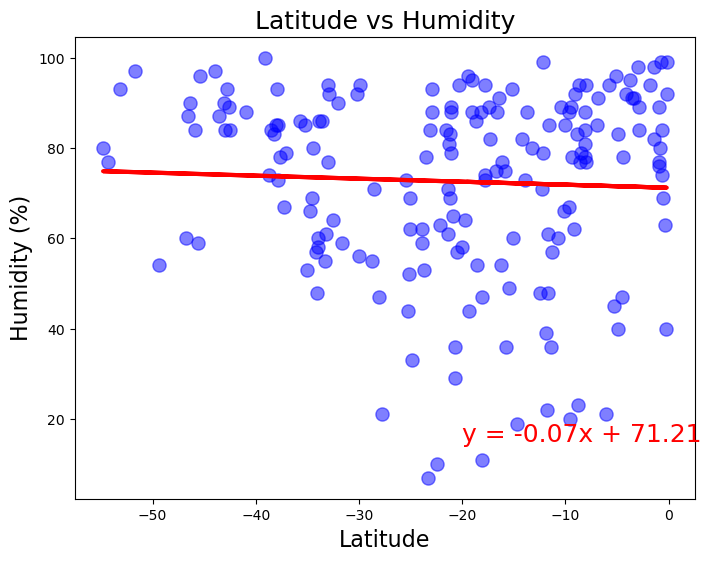

In [48]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 15, "Humidity (%)")
plt.title("Latitude vs Humidity", fontsize=18)
plt.savefig("output_data/Fig8.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship:
no linear relationship with Humidity and Latitudes in the Northern Hemisphere cities
no linear relationship with Humidity and Latitudes in the Southern Hemisphere citie6

# Cloudiness vs. Latitude Linear Regression Plot

The r^value is: 0.000318


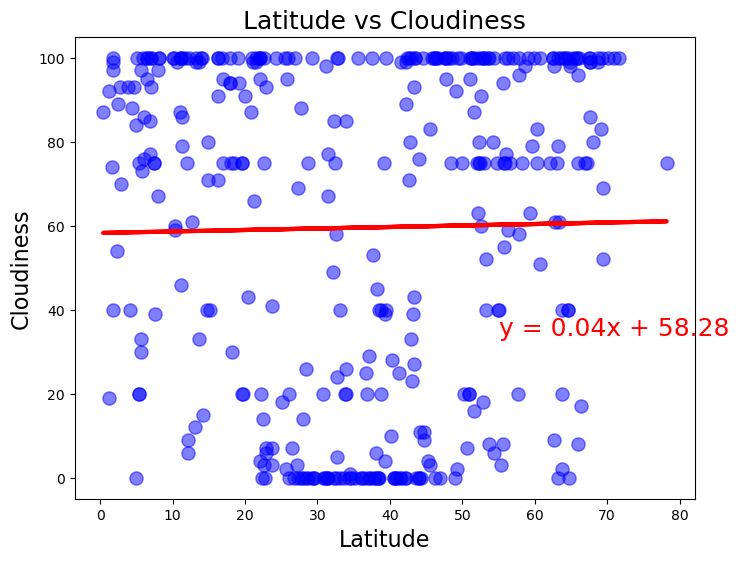

In [49]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 55, 34, "Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=18)
plt.savefig("output_data/Fig9.png",dpi=300, bbox_inches = "tight")

The r^value is: 0.02890893


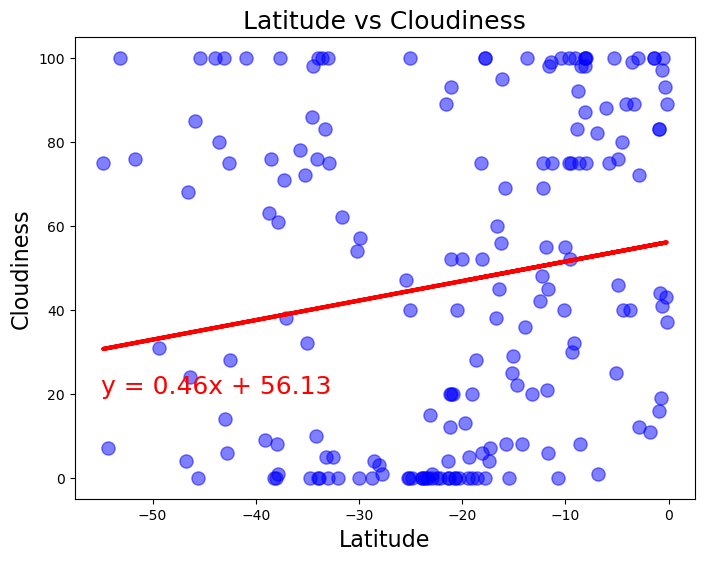

In [50]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -55, 20, "Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=18)
plt.savefig("output_data/Fig10.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship:
There is no correlation between latitude and wind speed for northern hemisphere.
There is a weak positive correlation between latitude and wind speed for southern hemisphere.

# Wind Speed vs. Latitude Linear Regression Plot

The r^value is: 0.00300824


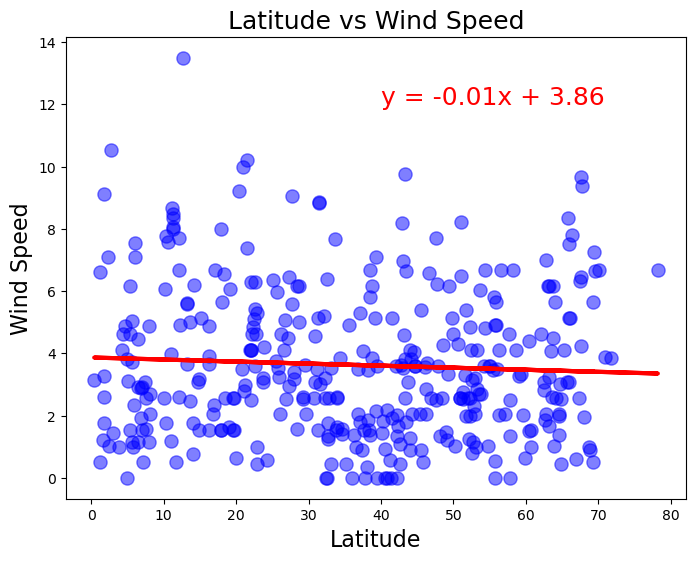

In [51]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 40, 12, "Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=18)
plt.savefig("output_data/Fig11.png",dpi=300, bbox_inches = "tight")

The r^value is: 0.00273232


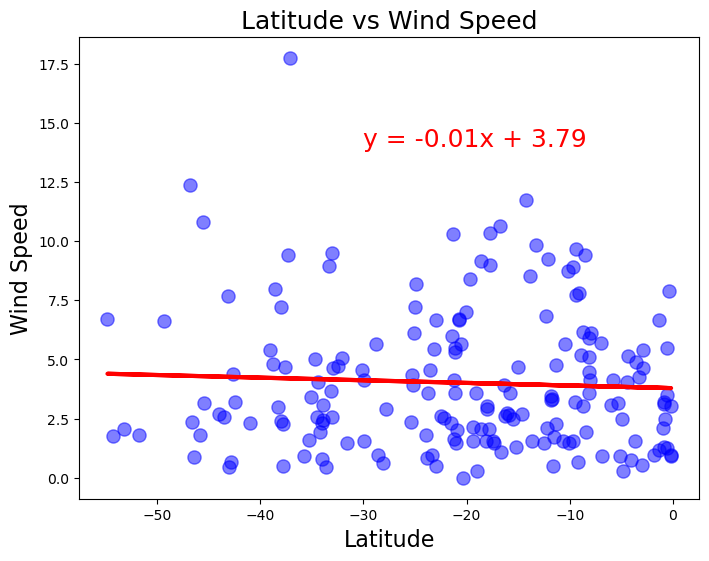

In [52]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -30, 14, "Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=18)
plt.savefig("output_data/Fig12.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship: The relationship between Cloudiness and Latitude is Stochastic.